# Minkowski Distance between Languages

Alan Wong  
April 19, 2018

## Introduction

Languages can be described in terms of features. A whole lot of information can be found at the [World Atlas of Lanugage Structures (WALS)](http://wals.info/) database. Here, though, I only look at a small number of languages and a small number of features.

We require vectors of equal length. (Other assumptions)


## Data

Language data is in `lang_data.txt` in this directory. It is presented in human and machine readable, plain text format, with white space dividing each entry. I chose a handful of features I thought were interesting.

- **OV** (Object-Verb) specifies whether or not objects come before verbs. In English, they typically don't, as in "I ate the pizza". Here, "the pizza", what I ate, comes after the verb.
- **Typology** specifies whether a language is generally isolating (1), fusional (2), or agglutinating (3). (Add a bit more about what this means).
- **Written** refers to if the language is commonly written with a standardized orthography or not.
- **[FSI](https://www.atlasandboots.com/foreign-service-institute-language-difficulty/)** (difficulty) is an integer corresponding to the Foreign Service Institute (FSI)'s estimation of how long it would take a native English speaker to gain proficiency in the target language.
- **Indo-European** is a language family, for which Sir William Jones (1746-1794) is known for proposing. 

As there isn't much data, I'll just display it all here:

In [133]:
import pandas as pd

data = pd.read_table('lang_data.txt', header=0, delim_whitespace=True)
print(data)

         Name Abbr   OV Tonal  Typology Written  FSI Indo-European
0     Chinese   cn   No   Yes         1     Yes    4            No
1     English   en   No    No         2     Yes    0           Yes
2   Esperanto   eo   No    No         3     Yes    1           Yes
3      French   fr   No    No         2     Yes    1           Yes
4      German   de   No    No         2     Yes    2           Yes
5  Indonesian   id   No    No         2     Yes    3            No
6    Japanese   jp  Yes   Yes         3     Yes    4            No
7      Korean   ko  Yes    No         3     Yes    4            No
8     Spanish   es   No    No         2     Yes    1           Yes


## Code

The code below for calculating Minkowski Distance as well as comparing and representing languages is for the most part adapted from John V. Guttag's *Introduction to Computation and Programming Using Python* (2016), with some small changes to fit the data I'm working with here (e.g. code changed to deal with languages rather than animals, which he used in his example in that book).

In [134]:
def minkowskiDist(v1, v2, p):
    """Assumes v1 and v2 are equal-length arrays of numbers
       Returns Minkowski distance of order p between v1 and v2"""
    dist = 0.0
    for i in range(len(v1)):
        dist += abs(v1[i] - v2[i])**p
    return dist**(1/p)

In [135]:
import pylab

class Language(object):
    def __init__(self, name, features):
        """Assumes name a string; features a list of numbers"""
        self.name = name
        self.features = pylab.array(features)
        
    def getName(self):
        return self.name
    
    def getFeatures(self):
        return self.features
    
    def distance(self, other):
        """Assumes other a Language
           Returns the Euclidean distance between feature vectors
           of self and other"""
        return minkowskiDist(self.getFeatures(),
                            other.getFeatures(), 2)

Now, we will process the data that we read in earlier, turning all feature values into integers.

In [136]:
myLanguages = []

for j in range(0,len(data)):
    # Read in features from pandas dataframe as list
    features = [data['OV'][j], data['Tonal'][j], data['Typology'][j],
               data['Written'][j], data['FSI'][j], data['Indo-European'][j]]
    # Convert features into integers
    for i in range(0,len(features)):
        if features[i] == 'No':
            features[i] = 0
        elif features[i] == 'Yes':
            features[i] = 1
    # Store list of language objects
    lang = Language(data['Abbr'][j],
                   features)
    myLanguages.append(lang)

In [137]:
def compareLanguages(languages, precision):
    """Assumes languages is a list of languages, precision an int >= 0
       Builds a table of Euclidean distance between each language"""
    # Get labels for columns and rows
    columnLabels = []
    for l in languages:
        columnLabels.append(l.getName())
    rowLabels = columnLabels[:]
    tableVals = []
    # Get distances between pairs of languages
    # For each row
    for l1 in languages:
        row = []
        # For each column
        for l2 in languages:
            if l1 == l2:
                row.append('--')
            else:
                distance = l1.distance(l2)
                row.append(str(round(distance, precision)))
        tableVals.append(row)
        
        
    fig, ax = pylab.subplots()
    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    
    # Produce table
    table = pylab.table(rowLabels = rowLabels,
                       colLabels = columnLabels,
                       cellText = tableVals,
                       cellLoc = 'center',
                       loc = 'top',
                       colWidths = [0.2]*len(languages))
    table.scale(1, 2.5)
    

                        

## Results

The strange lines below the table produced here are from the way `pylab` integrates tables with figures. I didn't produce any figure and managed to get rid of the labels on the axes but haven't been able to figure out how to get rid of the empty plot.

Now it looks like a note card with a cute fold up stand thing, ha!

The distances calculated in the table seem to match some intuitions. English, for instance, is more similar to French (1.0) than it is to Japanese (4.47). French and German  are taken to be very similar (1.0), as are Korean and Japanese (1.0).

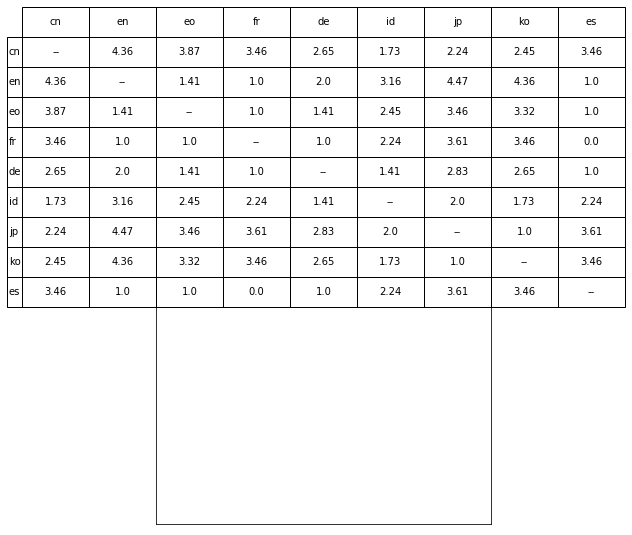

In [138]:
compareLanguages(myLanguages, 2)

## Discussion

In this small study, I used a small number of discrete features (6) representing similarities and differences between languages to quantify differences between a small sample of (9) languages. This study used a convenience sample (I selected languages I already knew about) and has a clear Anglophone bias, as exemplified by the selection of the FSI difficulty as a feature (which represents how hard a language is to learn for English speakers).

The approach of measuring Minkowski distance based of features is something that can be scaled to include more data, better features, and so forth. 

I probably need to find a better way to represent the calculated Minkowski distances, particularly if I add more languages. 

## References

Guttag, John V. *Introduction to computation and programming using Python.* 2nd ed. Cambridge, Massachusetts: MIT Press, 2016.